In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Auta_uhlikova_stopa.csv", index_col="Model")
df = df.apply(pd.to_numeric, errors="coerce")
df.head()

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km
Model,,,,,
Skoda Scala TSI,81,0.00,6000,4.70,111.00
Skoda Scala TDI,85,0.00,6000,4.40,126.00
Hyundai Kona,111,48.40,16000,14.60,68.11


In [56]:
annual_emissions = pd.read_csv(
    "WAM3 Annual Emmissions Development.csv",
    index_col=0,
    header=None,
    skiprows=1,
    names=["emissions_per_kwh"],
)

annual_emissions.index = annual_emissions.index.astype(int)

annual_emissions

,emissions_per_kwh
2014,0.50
2015,0.50
2016,0.50
2017,0.50
2018,0.50
2019,0.50
2020,0.48
2021,0.47
2022,0.47
2023,0.46


In [57]:
annual_mileage = [10000, 15000, 20000]

for mileage in annual_mileage:
    df[f"Najezd_{mileage}"] = df["Vyrobni_emise_kg"] + (
        mileage / 1000 * df["Emise_CO2_g_km"]
    )
df

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km,Najezd_10000,Najezd_15000,Najezd_20000
Model,,,,,,,,
Skoda Scala TSI,81,0.00,6000,4.70,111.00,7110.00,7665.00,8220.00
Skoda Scala TDI,85,0.00,6000,4.40,126.00,7260.00,7890.00,8520.00
Hyundai Kona,111,48.40,16000,14.60,68.11,16681.10,17021.65,17362.20


In [58]:
car_emissions = pd.DataFrame(index=df.index, columns=range(2023, 2031))

car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skoda Scala TDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyundai Kona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
cars = ["Skoda Scala TSI", "Skoda Scala TDI", "Hyundai Kona"]

for car in cars:
    car_emissions.loc[car] = 0

car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,0,0,0,0,0,0,0,0
Skoda Scala TDI,0,0,0,0,0,0,0,0
Hyundai Kona,0,0,0,0,0,0,0,0


In [60]:
car_emissions_10000 = car_emissions

In [61]:
for car in cars:
    for year in car_emissions_10000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_10000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 10000 / 1000 + production_emissions, 2
        )
car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.00,8220.00,9330.00,10440.00,11550.00,12660.00,13770.00,14880.00
Skoda Scala TDI,7260.00,8520.00,9780.00,11040.00,12300.00,13560.00,14820.00,16080.00
Hyundai Kona,16681.10,17362.20,18043.30,18724.40,19405.50,20086.60,20767.70,21448.80


In [62]:
# pd.set_option("display.float_format", "{:.2f}".format)

car_emissions_10000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_10000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 10000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_10000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)

car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.00,8220.00,9330.00,10440.00,11550.00,12660.00,13770.00,14880.00
Skoda Scala TDI,7260.00,8520.00,9780.00,11040.00,12300.00,13560.00,14820.00,16080.00
Hyundai Kona,16681.10,17362.20,18043.30,18724.40,19405.50,20086.60,20767.70,21448.80
Hyundai Kona*,16675.60,17326.16,17939.88,18505.96,19014.86,19458.42,19829.97,20124.31


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 10.000 km')

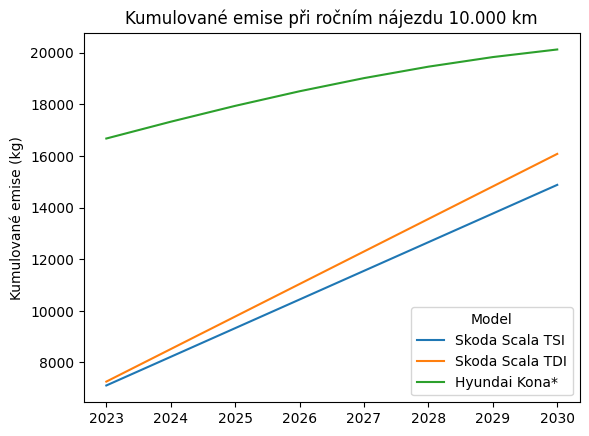

In [63]:
car_emissions_10000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 10.000 km")

In [64]:
car_emissions_15000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_15000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 15000 / 1000 + production_emissions, 2
        )

car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.00,9330.00,10995.00,12660.00,14325.00,15990.00,17655.00,19320.00
Skoda Scala TDI,7890.00,9780.00,11670.00,13560.00,15450.00,17340.00,19230.00,21120.00
Hyundai Kona,17021.65,18043.30,19064.95,20086.60,21108.25,22129.90,23151.55,24173.20
Hyundai Kona*,16675.60,17326.16,17939.88,18505.96,19014.86,19458.42,19829.97,20124.31


In [65]:
car_emissions_15000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_15000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 15000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_15000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)

car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.00,9330.00,10995.00,12660.00,14325.00,15990.00,17655.00,19320.00
Skoda Scala TDI,7890.00,9780.00,11670.00,13560.00,15450.00,17340.00,19230.00,21120.00
Hyundai Kona,17021.65,18043.30,19064.95,20086.60,21108.25,22129.90,23151.55,24173.20
Hyundai Kona*,17013.41,17989.24,18909.81,19758.94,20522.30,21187.63,21744.95,22186.47


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 15.000 km')

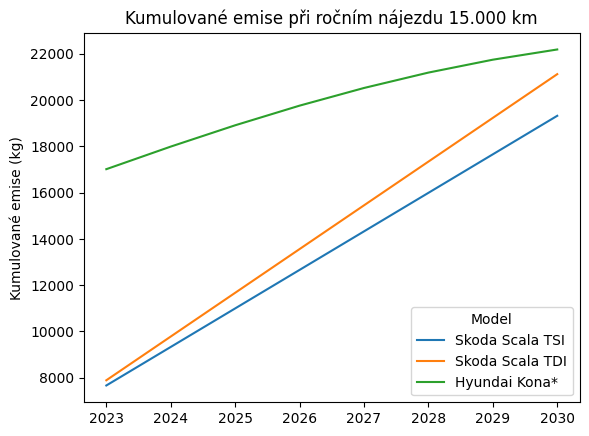

In [66]:
car_emissions_15000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 15.000 km")

In [67]:
car_emissions_20000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_20000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 20000 / 1000 + production_emissions, 2
        )

car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.00,10440.00,12660.00,14880.00,17100.00,19320.00,21540.00,23760.00
Skoda Scala TDI,8520.00,11040.00,13560.00,16080.00,18600.00,21120.00,23640.00,26160.00
Hyundai Kona,17362.20,18724.40,20086.60,21448.80,22811.00,24173.20,25535.40,26897.60
Hyundai Kona*,17013.41,17989.24,18909.81,19758.94,20522.30,21187.63,21744.95,22186.47


In [68]:
car_emissions_20000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_20000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 20000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_20000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)


car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.00,10440.00,12660.00,14880.00,17100.00,19320.00,21540.00,23760.00
Skoda Scala TDI,8520.00,11040.00,13560.00,16080.00,18600.00,21120.00,23640.00,26160.00
Hyundai Kona,17362.20,18724.40,20086.60,21448.80,22811.00,24173.20,25535.40,26897.60
Hyundai Kona*,17351.21,18652.32,19879.75,21011.92,22029.73,22916.85,23659.93,24248.63


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 20.000 km')

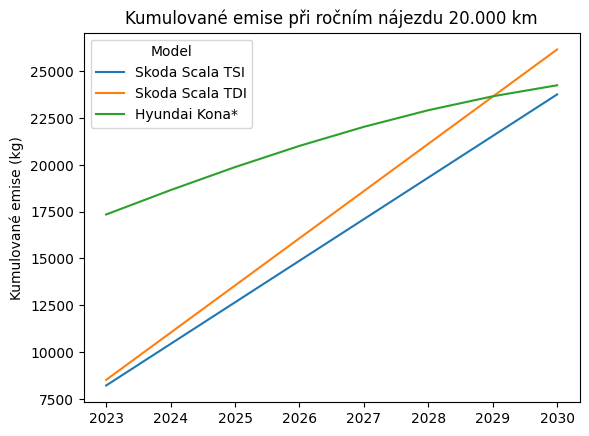

In [69]:
car_emissions_20000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 20.000 km")